# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import kagglehub
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from umap.umap_ import UMAP
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

2025-03-13 14:22:22.541411: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 14:22:22.851088: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741850542.959381   39356 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741850542.997258   39356 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 14:22:23.309034: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
path = kagglehub.dataset_download("jeleeladekunlefijabi/ship-performance-clustering-dataset")
file = os.listdir(path)[0]
print("Path to dataset file:", path)
print("Files name:", file)

df = pd.read_csv(path + f"/{file}")
df.head()
# df.to_csv(f"./{file}_Inisiasi.csv", index=False)

Path to dataset file: /home/hafizh/.cache/kagglehub/datasets/jeleeladekunlefijabi/ship-performance-clustering-dataset/versions/1
Files name: Ship_Performance_Dataset.csv


,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# General information about the dataset
df.info()
# There are total 2736 rows and 18 columns in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [4]:
# Descriptive statistics of the dataset
df.describe(include='all')

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736,2600,2600,2600,2600,2736.000000,2736.000000,2736.000000,2736.000000,2600,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
unique,57,4,4,3,3,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-06-04,Bulk Carrier,Long-haul,Diesel,Good,NaN,NaN,NaN,NaN,Calm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,48,669,686,892,873,NaN,NaN,NaN,NaN,893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,17.602863,1757.610939,1036.406203,9.929103,NaN,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,NaN,NaN,NaN,NaN,NaN,4.311979,717.002777,568.632080,2.876423,NaN,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,NaN,NaN,NaN,NaN,NaN,10.009756,501.025220,50.433150,5.001947,NaN,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,NaN,NaN,NaN,NaN,NaN,13.928452,1148.104914,548.511573,7.437485,NaN,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,NaN,NaN,NaN,NaN,NaN,17.713757,1757.494344,1037.816060,9.918965,NaN,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,NaN,NaN,NaN,NaN,NaN,21.284785,2382.594292,1540.934161,12.413149,NaN,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205


In [ ]:
# 1a. Understanding Data Structure, view the number of rows and columns in the dataset
print(df.shape)
# Again, there are total 2736 rows and 18 columns in the dataset.

(2736, 18)


In [6]:
# 1b. Understanding Data Structure, view the categorical data types
print("Here list of categorical columns :", df.select_dtypes(include='object').columns.tolist())
print("Here the sample from categorial columns data :")
df.select_dtypes(include='object').sample(5)

Here list of categorical columns : ['Date', 'Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']
Here the sample from categorial columns data :


,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
1578,2024-03-03,Fish Carrier,Long-haul,Steam Turbine,Good,Moderate
757,2023-09-24,Tanker,Transoceanic,Steam Turbine,Fair,Rough
74,2023-10-01,Bulk Carrier,Transoceanic,Heavy Fuel Oil (HFO),Critical,NaN
2067,2023-09-17,Fish Carrier,Long-haul,Diesel,Critical,Calm
585,2023-09-17,Tanker,Short-haul,Steam Turbine,Good,Rough


In [7]:
# 1c. Understanding Data Structure, view the numerical data types
print("Here the list of numerical columns: ", df.select_dtypes(exclude='object').columns.tolist())
print("Here the sample from numerical columns data :")
df.select_dtypes(exclude='object').sample(5)

Here the list of numerical columns:  ['Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD', 'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage']
Here the sample from numerical columns data :


,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
175,20.584429,860.209466,1577.804352,7.782659,1967.769423,156732.282300,390824.077108,24.290879,1.089943,1.060857,1,72.733389
822,20.262325,2987.465472,1861.529848,6.889476,1026.734040,451555.453792,99413.351531,42.380133,0.513330,1.253609,5,59.347586
2147,22.415623,610.712403,1836.821744,10.132157,1413.102309,189823.316281,699631.654008,53.590652,0.658021,0.731829,3,91.388084
1504,19.406992,1465.527606,1959.879550,9.708907,55.369196,416188.541240,180203.751261,63.670480,0.434477,0.504531,4,86.246926
1791,22.764223,2643.574090,125.332430,14.518076,845.685666,497140.327832,959164.345478,34.450936,0.603552,1.079829,2,77.684431


In [8]:
# 2. Handling Missing Values
# Check for missing values
print("Here the missing values in the categorical data type inside the dataset :")
print(df.select_dtypes(include='object').isnull().sum())
print("\n")
print("Here the missing values in the categorical data type inside the dataset :")
print(df.select_dtypes(exclude='object').isnull().sum())
# Because there are several missing values in categorical data type, we will drop the missing values in the dataset

Here the missing values in the categorical data type inside the dataset :
Date                    0
Ship_Type             136
Route_Type            136
Engine_Type           136
Maintenance_Status    136
Weather_Condition     136
dtype: int64


Here the missing values in the categorical data type inside the dataset :
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64


In [9]:
# 3aa. Distribution and Correlation Analysis, statistical descriptive of numerical data type inside the dataset
df.describe(exclude='object')

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


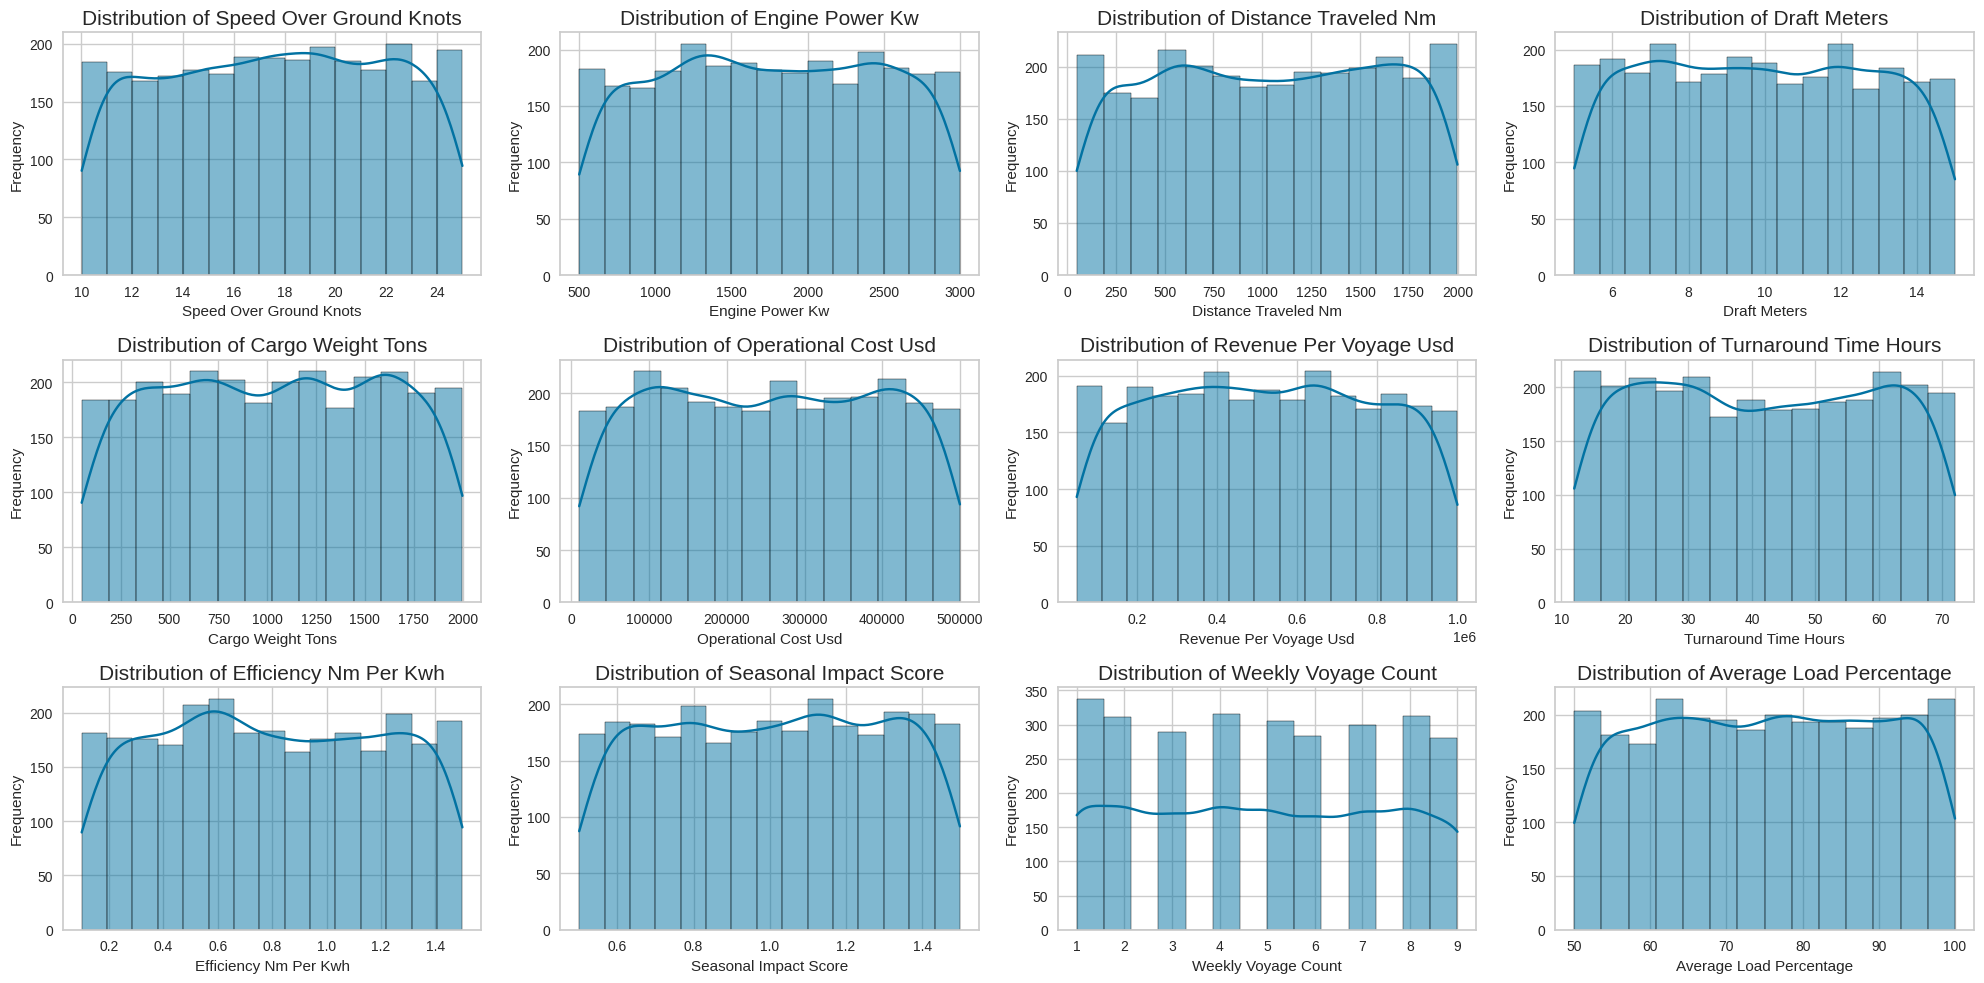

In [10]:
# 3ab. Distribution and Correlation Analysis, histogram visualization of numerical data type inside the dataset
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.select_dtypes(exclude='object').columns.tolist()):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', size=15)
    plt.xlabel(f'{col.replace("_", " ").title()}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [11]:
# 3ac. Distribution and Correlation Analysis, statistical descriptive of categorical data type inside the dataset
df.describe(include='object')

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
count,2736,2600,2600,2600,2600,2600
unique,57,4,4,3,3,3
top,2023-06-04,Bulk Carrier,Long-haul,Diesel,Good,Calm
freq,48,669,686,892,873,893


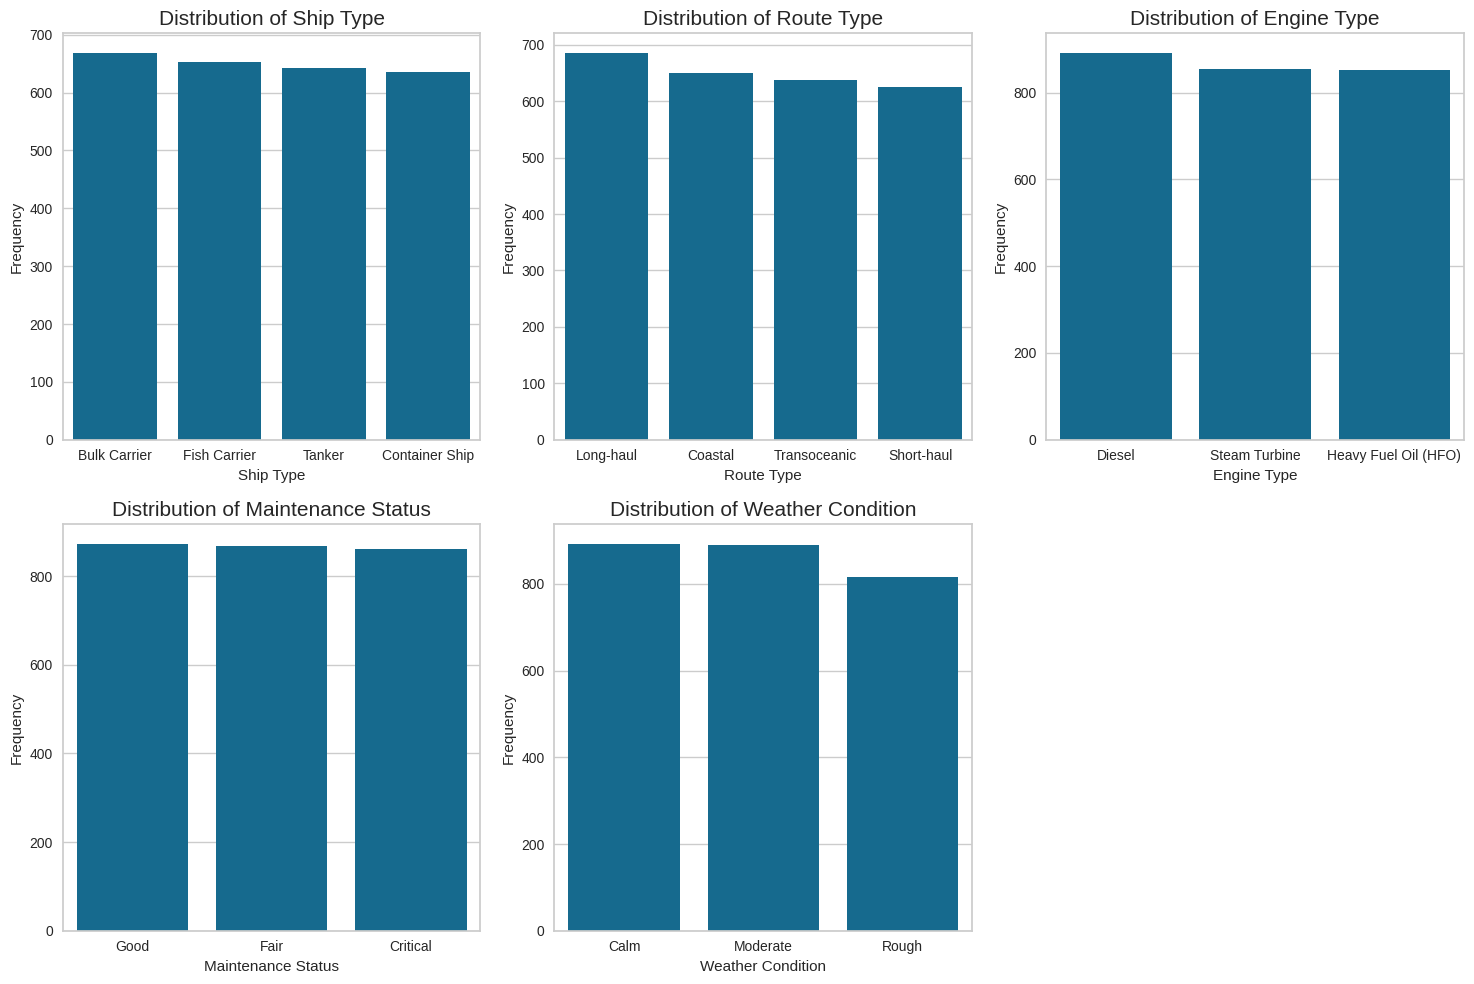

In [12]:
# 3ad. Distribution and Correlation Analysis, bar chart visualization of categorical data type inside the dataset
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include='object').columns.tolist()[1:]): # Exclude the first column (Date)
    plt.subplot(2, 3, i+1)
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', size=15)
    plt.xlabel(f'{col.replace("_", " ").title()}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

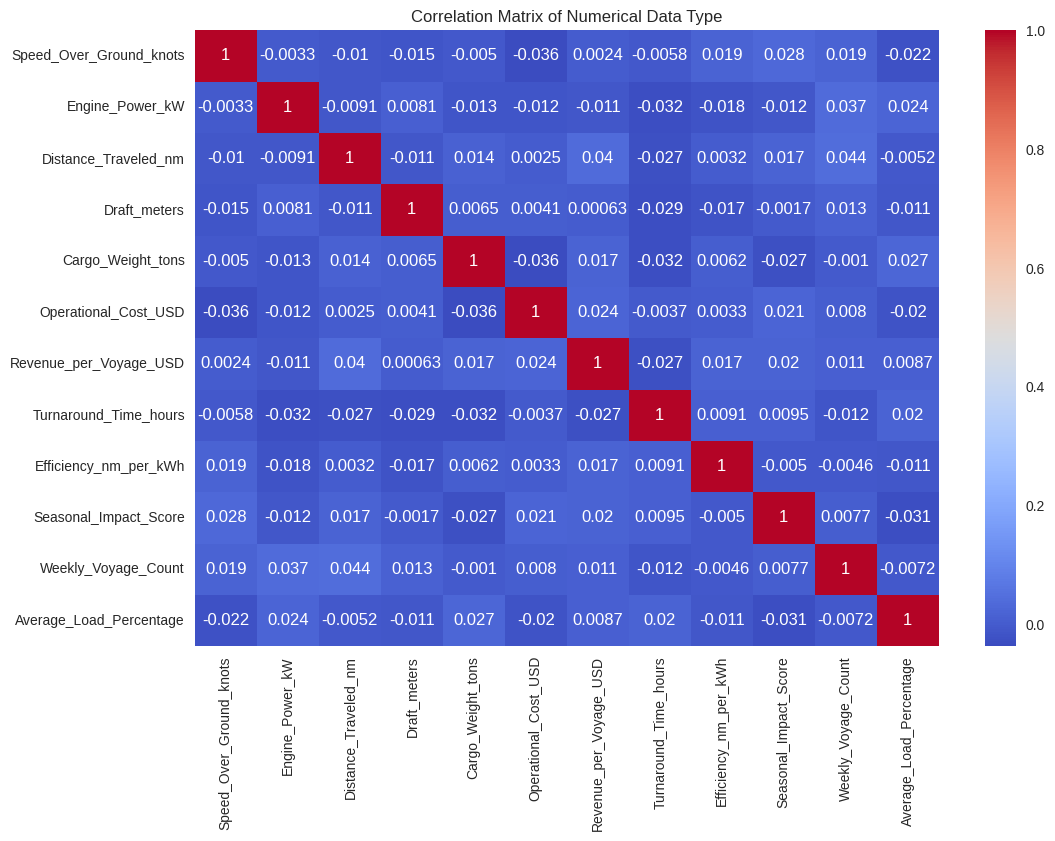

In [13]:
# 3b. Distribution and Correlation Analysis, matrix correlation of numerical data type inside the dataset
df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Data Type")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [14]:
# 1. Remove the column Date because it is not needed
df.drop(columns=['Date'], inplace=True)
print("All column needed", df.columns.tolist())

All column needed ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm', 'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD', 'Turnaround_Time_hours', 'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count', 'Average_Load_Percentage']


In [15]:
# 2. Drop the missing values in the dataset
df.dropna(inplace=True)
print("Here the missing values after cleaning :")
print(df.isnull().sum())

Here the missing values after cleaning :
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64


In [16]:
# 3. Label Encoding for the categorical data type and standardization to categorical data type
numeric_df = df.select_dtypes(exclude='object').columns.tolist()
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[numeric_df])
df_scaled = pd.DataFrame(df_scaled, columns=numeric_df)

object_df = df.select_dtypes(include='object').columns.tolist()
df_encoded = pd.DataFrame()
for col in object_df:
    le = LabelEncoder()
    encoded_col = pd.DataFrame(le.fit_transform(df[col]), columns=[col])
    df_encoded = pd.concat([df_encoded, encoded_col], axis=1)

print("Here the sample of the dataset after label encoding ang scaling :")
new_df = pd.concat([df_scaled, df_encoded], axis=1)
new_df.sample(5)


Here the sample of the dataset after label encoding ang scaling :


,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
2110,0.810577,0.616086,0.343919,0.687672,0.935166,0.927432,0.555203,0.797600,0.932329,0.053792,0.375,0.161719,3,3,0,0,1
443,0.827772,0.499091,0.336817,0.793747,0.937874,0.100070,0.285982,0.843618,0.933473,0.626962,0.250,0.410681,0,1,1,0,2
711,0.483483,0.884681,0.389227,0.647311,0.008143,0.822953,0.390743,0.717372,0.384721,0.243549,0.875,0.217010,0,1,0,0,0
153,0.746886,0.385415,0.387211,0.688213,0.616780,0.765091,0.432673,0.896963,0.003234,0.454857,1.000,0.881218,0,0,0,0,2
344,0.475473,0.557841,0.794317,0.570251,0.544310,0.911401,0.260245,0.465632,0.043785,0.777831,0.875,0.381124,3,3,2,2,1


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

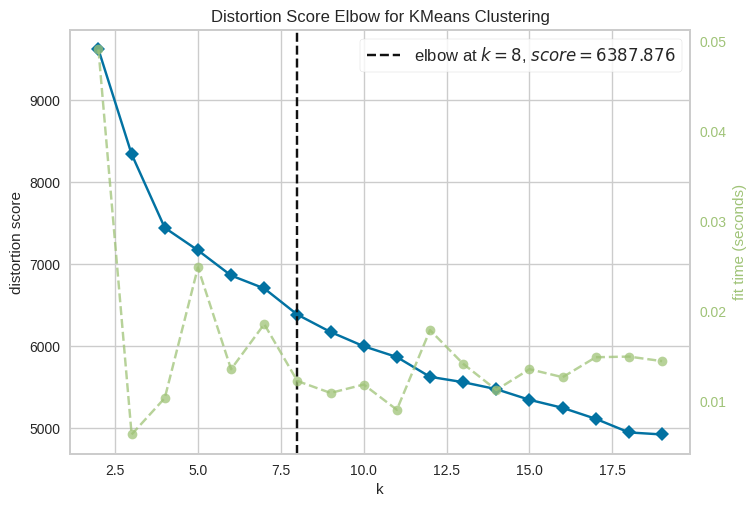

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Use elbow method to determine the optimal number of clusters
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 20))
visu.fit(new_df)
visu.show()

In [18]:
km = KMeans(n_clusters=6).fit(new_df)
labels = km.labels_
n_clusters = len(set(labels))
print(set(labels))
print(f"Number of clusters created: {n_clusters}")

{np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5)}
Number of clusters created: 6


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [19]:
# Silhouette score for KMeans
silhouette_score(new_df, labels)

np.float64(0.12290667198892205)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Use UMAP to reduce the dimensionality of the dataset
umap = UMAP(n_components=2)  # Reduce to 2 dimensions
df_selected = umap.fit_transform(new_df)
df_selected = pd.DataFrame(df_selected, columns=umap.get_feature_names_out())

/home/hafizh/miniconda3/envs/MainCuda/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


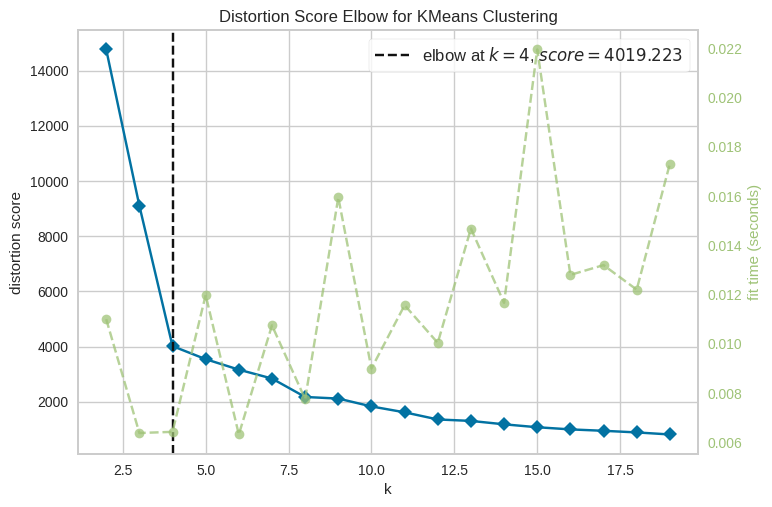

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Use elbow method again to determine the optimal number of clusters
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 20))
visu.fit(df_selected)
visu.show()

In [ ]:
# Fit to KMeans
km2 = KMeans(n_clusters=4).fit(df_selected)
labelss = km2.labels_
n_clusterss = len(set(labelss))# - (1 if -1 in labels else 0)
print(set(labelss))
print(f"Number of clusters created: {n_clusterss}")

{np.int32(0), np.int32(1), np.int32(2), np.int32(3)}
Number of clusters created: 4


In [23]:
# The new silhouette score
silhouette_score(df_selected, labelss)
# The silhouette score is higher than before

np.float32(0.5379683)

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

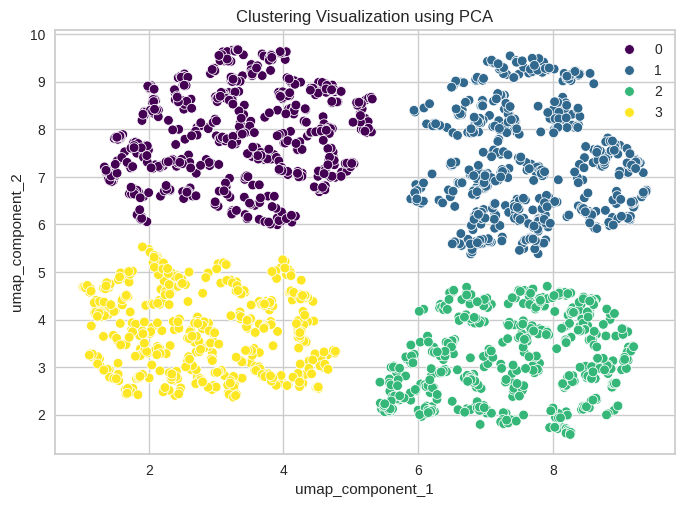

In [24]:
sns.scatterplot(x=df_selected['umap_component_1'], y=df_selected['umap_component_2'], hue=labelss, palette='viridis')
plt.title("Clustering Visualization using PCA")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [25]:
# Type your code here
df_labelled = df.copy()

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [26]:
# Type your code here
df_labelled['cluster'] = labelss
df_labelled.sample(5)

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,cluster
1095,Container Ship,Transoceanic,Diesel,Critical,12.041368,2145.238659,1389.890857,7.016257,Rough,466.607118,114394.182203,784980.754465,28.017381,0.152391,0.533879,1,77.509980,3
2080,Container Ship,Transoceanic,Steam Turbine,Fair,18.009204,2805.882053,1873.587481,5.047565,Rough,753.690268,47274.129664,904395.386127,27.677667,0.976688,0.942830,9,93.666018,3
1877,Container Ship,Short-haul,Heavy Fuel Oil (HFO),Fair,18.232369,1962.862553,568.099274,8.042816,Calm,874.020406,341636.113507,219025.630123,60.290760,1.270902,0.908916,3,61.770924,3
296,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,17.070688,1304.690740,1528.378322,13.739565,Calm,863.084839,495353.256936,128567.321378,16.412917,1.153223,0.870940,7,93.890212,3
1647,Container Ship,Coastal,Diesel,Fair,14.978023,2948.518811,95.803411,12.755311,Calm,492.113788,219655.826683,413883.985768,66.748136,0.259598,0.892221,1,53.705875,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [36]:
grouped = df_labelled.select_dtypes(exclude='object').groupby('cluster').agg('mean')
grouped[['Engine_Power_kW', 'Distance_Traveled_nm', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD']].round(2)

,Engine_Power_kW,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD
cluster,,,,,
0,1727.34,1032.92,992.33,257866.52,520364.21
1,1759.64,1068.74,1083.63,249710.31,526178.30
2,1779.84,1036.93,1017.36,261946.84,519321.45
3,1738.77,1016.37,1041.71,258959.90,527971.38


In [41]:
grouped[['Engine_Power_kW', 'Distance_Traveled_nm', 'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD']].round(2).describe()

,Engine_Power_kW,Distance_Traveled_nm,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD
count,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1751.397500,1038.740000,1033.757500,257120.892500,523458.835000
std,23.202957,21.890374,38.882834,5232.730683,4260.407289
min,1727.340000,1016.370000,992.330000,249710.310000,519321.450000
25%,1735.912500,1028.782500,1011.102500,255827.467500,520103.520000
50%,1749.205000,1034.925000,1029.535000,258413.210000,523271.255000
75%,1764.690000,1044.882500,1052.190000,259706.635000,526626.570000
max,1779.840000,1068.740000,1083.630000,261946.840000,527971.380000


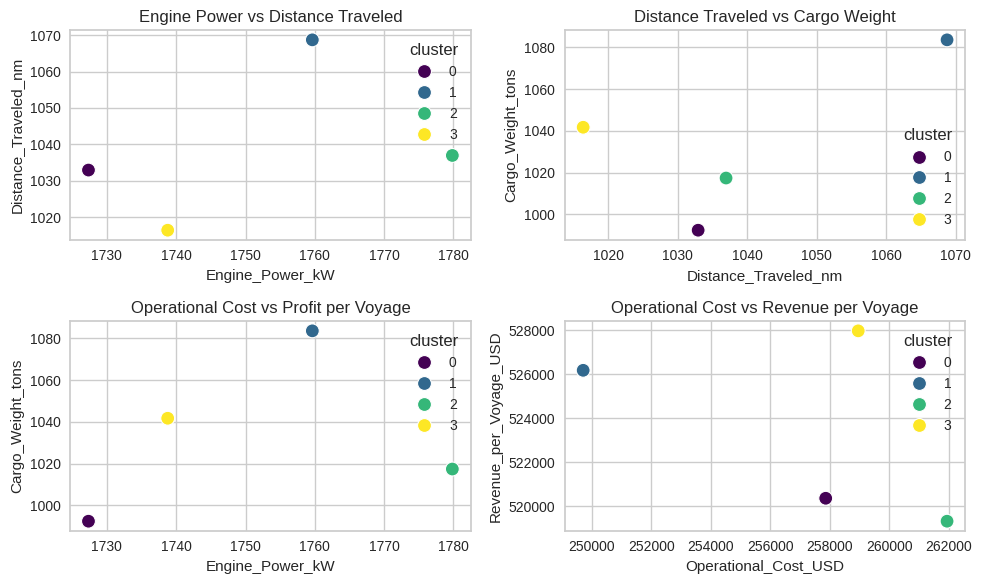

In [39]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(x=grouped['Engine_Power_kW'], y=grouped['Distance_Traveled_nm'], hue=grouped.index, palette='viridis', s=100)
plt.title("Engine Power vs Distance Traveled")

plt.subplot(2, 2, 2)
sns.scatterplot(x=grouped['Distance_Traveled_nm'], y=grouped['Cargo_Weight_tons'], hue=grouped.index, palette='viridis', s=100)
plt.title("Distance Traveled vs Cargo Weight")

plt.subplot(2, 2, 3)
sns.scatterplot(x=grouped['Engine_Power_kW'], y=grouped['Cargo_Weight_tons'], hue=grouped.index, palette='viridis', s=100)
plt.title("Operational Cost vs Profit per Voyage")

plt.subplot(2, 2, 4)
sns.scatterplot(x=grouped['Operational_Cost_USD'], y=grouped['Revenue_per_Voyage_USD'], hue=grouped.index, palette='viridis', s=100)
plt.title("Operational Cost vs Revenue per Voyage")

plt.tight_layout()
plt.show()

# Cluster Analysis Characteristic from KMeans Model
## **Possibly high, different result for each KMeans runs!**

**First of all**, every cluster has their own profit!

Below the analysis characteristic for each cluster, generated from KMeans model.

## Cluster 0:
- **Mean Engine Power (Kilowatts):** 1727.34
- **Mean Distance Traveled (Nautical Miles):** 1032.92
- **Mean Cargo Weight (Tons):** 992.33
- **Mean Operational Cost (USD):** 257866.52
- **Mean Revenue per Voyage (USD):** 520364.21
- **Analysis:** Ship cluster with the lowest engine power and lightest cargo. However, the revenue still below average and slightly high operational cost. It looks like this ship cluster ideal for shorter-distance routes. Maybe, try optimize operational cost and improve cargo efficiency for higher revenue.

## Cluster 1:
- **Mean Engine Power (Kilowatts):** 1759.64
- **Mean Distance Traveled (Nautical Miles):** 1068.74
- **Mean Cargo Weight (Tons):** 1083.63
- **Mean Operational Cost (USD):** 249710.31
- **Mean Revenue per Voyage (USD):** 526178.30
- **Analysis:** The most profitable and efficient ship cluster. This ship cluster travels has the farthest route with the heaviest cargo, yet have the lowest operational costs and relatively high revenue. It looks like this ship cluster has more advanced technology and investment.

## Cluster 2:
- **Mean Engine Power (Kilowatts):** 1779.84
- **Mean Distance Traveled (Nautical Miles):** 1036.93
- **Mean Cargo Weight (Tons):** 1017.36
- **Mean Operational Cost (USD):** 261946.84
- **Mean Revenue per Voyage (USD):** 519321.45
- **Analysis:** Ship cluster with the least efficient. It shows from highest engine power, leading to the highest operational cost but the lowest revenue. Ships in this cluster need an operational adjustment, such as reducing fuel consumption or optimizing routes. There is a chance that ship in this cluster need a machine upgrade or retire the old ones.

## Cluster 3:
- **Mean Engine Power (Kilowatts):** 1738.77
- **Mean Distance Traveled (Nautical Miles):** 1016.37
- **Mean Cargo Weight (Tons):** 1041.71
- **Mean Operational Cost (USD):** 258959.90
- **Mean Revenue per Voyage (USD):** 527971.38
- **Analysis:** Ship cluster with the most balanced performance among all cluster. It shows with moderate engine power, carrying average-weight cargo, and high revenue. The only problem is operational costs are still high but the routes is the nearest among all cluster. Try to reduce the operational cost to boost efficiency.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# df_labelled.to_csv(f"./{file}_Clustering.csv", index=False)